<a href="https://colab.research.google.com/github/arjunsumina/KNOWLEDGE/blob/main/METHODS/ensemble_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/TEACHING_MATERIAL/MACHINE_LEARNING/DATA/creditcard.csv')

In [4]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Time - Time elapsed between the transaction and the first transaction
V1 to V28 are transformed PCA obtained by PCA
Amount - Transaction Amount
Class - 1 - Fraud Detected
Class - 0 - Fraud Non-Detected

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The dataset is an imbalanced data set with 492 frauds out of 284315 transactions

In [7]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [8]:
X = df.drop('Class',axis = 1)
y = df.Class

The stratify parameter ensures that the class distribution is the same in both the training and testing sets. This is especially useful in classification problems where the data might be imbalanced, meaning one class is significantly more frequent than another.

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13,stratify=y)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('size of test data',X_test.shape)
print('size of train data',X_train.shape)


size of test data (71202, 30)
size of train data (213605, 30)


In [13]:
from imblearn.ensemble import EasyEnsembleClassifier

In [14]:
# number of weak classifiers is 10
ee = EasyEnsembleClassifier(n_estimators=10,random_state=13)
ee.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The EasyEnsembleClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:445: FutureWarning: The `_safe_tags` function is deprecated in 1.6 and will be removed in 1.7. Use the public `get_tags` function instead and make sure to implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

EasyEnsembleClassifier(random_state=13)

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The EasyEnsembleClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:445: FutureWarning: The `_safe_tags` function is deprecated in 1.6 and will be removed in 1.7. Use the public `get_tags` function instead and make sure to implement the `__sklearn_tags__` method.
  warnings.warn(


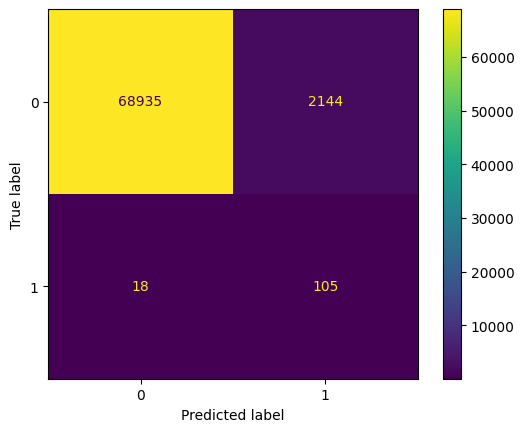

In [18]:
ConfusionMatrixDisplay.from_estimator(ee,X_test,y_test)

In [23]:
from sklearn.metrics import roc_auc_score,f1_score
y_pred = ee.predict(X_test)
y_pred_probs = ee.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test,y_pred_probs)
f1 = f1_score(y_test,y_pred)
print('auc of the model',auc)
print('f1 of the model',f1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The EasyEnsembleClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:445: FutureWarning: The `_safe_tags` function is deprecated in 1.6 and will be removed in 1.7. Use the public `get_tags` function instead and make sure to implement the `__sklearn_tags__` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The EasyEnsembleClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define th

auc of the model 0.9707300373556642
f1 of the model 0.08853288364249579
